## 20.1 Capstone Exploratory Data Analysis

This notebook contains the exploratory data analysis (EDA) for my capstone project in the Professional Certificate in Machine Learning and Artificial Intelligence cource from the University of California, Berkley

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
import os
from PIL import Image, ImageOps
from sklearn.linear_model import LogisticRegression



In [2]:
# Download latest version
path = kagglehub.dataset_download("vishesh1412/celebrity-face-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/jack/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1


### Read in the Images using the Python Image Library (PIL) 
- Convert all images to the same size with each having 3 channels of data
- Greyscale images have their channels duplicated
- Aspect ratios are corrected through croping
- Image size is correct through blurring or upsampling

In [4]:
# Path to the dataset
base_dir = os.path.expanduser(path + '//Celebrity Faces Dataset')
image_size = (224, 224)  # You can change this if you want a different size
print(base_dir)
images = []
labels = []

# Traverse each subfolder (person)
for person in os.listdir(base_dir):
    person_dir = os.path.join(base_dir, person)
    if os.path.isdir(person_dir):
        for filename in os.listdir(person_dir):
            if filename.lower().endswith('.jpg') or filename.lower().endswith('.jpeg'):
                img_path = os.path.join(person_dir, filename)
                try:
                    img = Image.open(img_path).convert('RGB')
                    #print(img.size)
                    #img = img.resize(image_size)
                    img = ImageOps.pad(img, image_size, color=(0, 0, 0))
            
                    images.append(np.array(img))
                    labels.append(person)
                except Exception as e:
                    print(f"Error reading {img_path}: {e}")

images_np = np.array(images)
labels_np = np.array(labels)

print(images_np.shape)  # (num_images, 224, 224, 3)
print(labels_np.shape)  # (num_images,)

/home/jack/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1//Celebrity Faces Dataset
(1800, 224, 224, 3)
(1800,)


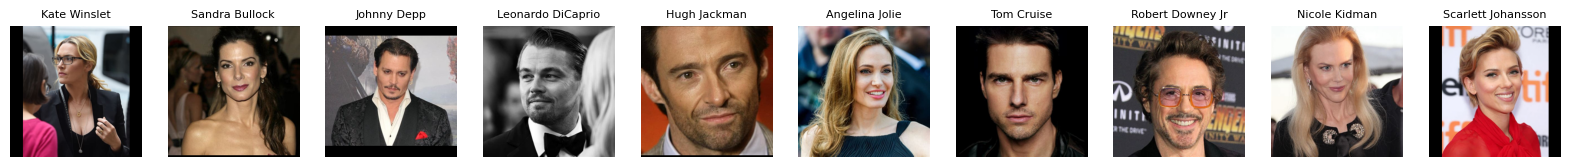

In [9]:
# Dictionary to store the first image index for each celebrity
first_indices = {}
for idx, label in enumerate(labels):
    if label not in first_indices:
        first_indices[label] = idx + 40

# Get the first image and label for each celebrity
first_images = [images[i] for i in first_indices.values()]
first_labels = list(first_indices.keys())

# Plot (limit to 10 for display)
plt.figure(figsize=(20, 4))
for i, (img, label) in enumerate(zip(first_images[:10], first_labels[:10])):
    plt.subplot(1, 10, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label, fontsize=8)
plt.show()